# Library Imports

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

# Functions

In [2]:
def df_to_list(dataframe):
    ## Outputs to three lists ankle, hand, pocket and the tester 
    ## Assumed: The dataframe is for the same tester and it is ordered by 3 ankles, 3 hands, 3 pockets
    total_list = dataframe[['x_accel', 'y_accel', 'z_accel']].values.tolist()
    
    ankle = total_list[0:3]
    hand = total_list[3:6]
    pocket = total_list[6:9]
    tester = dataframe['tester'].tolist()[0:3] # array of size 3 so easy to plug into GaussianNB
    
    return ankle, hand, pocket, tester

In [3]:
def full_df_to_list(dataframe):
    ## Outputs full list regardless of where data was recorded
    ## Assumed: The dataframe is for the same tester
    total_list = dataframe[['x_accel', 'y_accel', 'z_accel']].values.tolist()
    tester = dataframe['tester'].tolist()

    return total_list, tester

In [4]:
# Runs the test 300 times and returns the average score
def average_score(model, x, y):
    score = 0
    tests = 300
    for i in range(tests):
        x_train, x_valid, y_train, y_valid = train_test_split(x, y)
        model.fit(x_train, y_train)
        score = score + model.score(x_valid, y_valid)
    return (score/tests).round(5)

In [5]:
def gaussian(x, y):
    model = GaussianNB()
    return average_score(model, x, y)

In [6]:
def polyfit(x, y):
    model = make_pipeline(
        PolynomialFeatures(5),
        LinearRegression(fit_intercept=False)
    )
    return average_score(model, x, y)

In [7]:
def neighbors(x, y):
    model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=9)
    )
    return average_score(model, x, y)

In [8]:
def decision(x, y):
    model = DecisionTreeClassifier(max_depth=8)
    return average_score(model, x, y)

In [9]:
def svc(x, y):
    model = make_pipeline(
    PCA(2),
    SVC(kernel='linear', C=2.0)
    )
    return average_score(model, x, y)

In [10]:
def mlp(x, y):
    model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=())
    return average_score(model, x, y)

In [11]:
def triple(data):
    return [data['x_accel'], data['y_accel'], data['z_accel']]

# Data Manipulation

In [12]:
# 0 = ankle, 1 = hand, 2 = pocket
location = pd.DataFrame([0, 0, 0, 1, 1, 1, 2, 2, 2], columns=['location'])

p1_data_mean = pd.read_csv('p1-mean.csv').join(location)
p1_data_std = pd.read_csv('p1-std.csv').join(location)
p2_data_mean = pd.read_csv('p2-mean.csv').join(location)
p2_data_std = pd.read_csv('p2-std.csv').join(location)
p3_data_mean = pd.read_csv('p3-mean.csv').join(location)
p3_data_std = pd.read_csv('p3-std.csv').join(location)
p4_data_mean = pd.read_csv('p4-mean.csv').join(location)
p4_data_std = pd.read_csv('p4-std.csv').join(location)

left_data_mean = pd.read_csv('left-mean.csv').join(location)
left_data_std = pd.read_csv('left-std.csv').join(location)
right_data_mean = pd.read_csv('right-mean.csv').join(location)
right_data_std = pd.read_csv('right-std.csv').join(location)

In [13]:
# Appends all user data into one array per type to do machine learning tests
data_mean = p1_data_mean
data_mean = data_mean.append(p2_data_mean)
data_mean = data_mean.append(p3_data_mean)
data_mean = data_mean.append(p4_data_mean)

data_std = p1_data_std
data_std = data_std.append(p2_data_std)
data_std = data_std.append(p3_data_std)
data_std = data_std.append(p4_data_std)

side_mean = left_data_mean
side_mean = side_mean.append(right_data_mean)
side_std = right_data_std
side_std = side_std.append(right_data_std)

# Stats Tests

In [14]:
# Groups all data by location
# 0 = ankle, 1 = hand, 2 = pocket
data_ankle = data_mean[data_mean['location']==0]
data_hand = data_mean[data_mean['location']==1]
data_pocket = data_mean[data_mean['location']==2]

In [26]:
# Mann–Whitney  test to figure out if the means are different per location
print("ankle/hand x,y,z:", stats.mannwhitneyu(triple(data_ankle.mean()), triple(data_hand.mean())).pvalue)
print("ankle/pocket x,y,z:", stats.mannwhitneyu(triple(data_ankle.mean()), triple(data_pocket.mean())).pvalue)
print("hand/pocket x,y,z:", stats.mannwhitneyu(triple(data_hand.mean()), triple(data_pocket.mean())).pvalue)
print("ankle/hand x:", stats.mannwhitneyu(data_ankle['x_accel'], data_hand['x_accel']).pvalue)
print("ankle/pocket x:", stats.mannwhitneyu(data_ankle['x_accel'], data_pocket['x_accel']).pvalue)
print("hand/pocket x:", stats.mannwhitneyu(data_hand['x_accel'], data_pocket['x_accel']).pvalue)
print("ankle/hand y:", stats.mannwhitneyu(data_ankle['y_accel'], data_hand['y_accel']).pvalue)
print("ankle/pocket y:", stats.mannwhitneyu(data_ankle['y_accel'], data_pocket['y_accel']).pvalue)
print("hand/pocket y:", stats.mannwhitneyu(data_hand['y_accel'], data_pocket['y_accel']).pvalue)
print("ankle/hand z:", stats.mannwhitneyu(data_ankle['z_accel'], data_hand['z_accel']).pvalue)
print("ankle/pocket z:", stats.mannwhitneyu(data_ankle['z_accel'], data_pocket['z_accel']).pvalue)
print("hand/pocket z:", stats.mannwhitneyu(data_hand['z_accel'], data_pocket['z_accel']).pvalue)

ankle/hand x,y,z: 0.5
ankle/pocket x,y,z: 0.19136654444261297
hand/pocket x,y,z: 0.19136654444261297
ankle/hand x: 0.03030098485600307
ankle/pocket x: 0.23519495838172844
hand/pocket x: 0.07856126079198153
ankle/hand y: 0.0014728230752664906
ankle/pocket y: 0.00036476545976758703
hand/pocket y: 0.044232251394851124
ankle/hand z: 0.020202059794111847
ankle/pocket z: 0.13006628411592697
hand/pocket z: 0.0002952060409722729


In [30]:
# Mann–Whitney test to figure out if the means are different per user
print("p1/p2 x,y,z:", stats.mannwhitneyu(triple(p1_data_mean.mean()), triple(p2_data_mean.mean())).pvalue)
print("p1/p3 x,y,z:", stats.mannwhitneyu(triple(p1_data_mean.mean()), triple(p3_data_mean.mean())).pvalue)
print("p2/p3 x,y,z:", stats.mannwhitneyu(triple(p2_data_mean.mean()), triple(p3_data_mean.mean())).pvalue)
print("p1/p2 x:", stats.mannwhitneyu(p1_data_mean['x_accel'], p2_data_mean['x_accel']).pvalue)
print("p1/p3 x:", stats.mannwhitneyu(p1_data_mean['x_accel'], p3_data_mean['x_accel']).pvalue)
print("p2/p3 x:", stats.mannwhitneyu(p2_data_mean['x_accel'], p3_data_mean['x_accel']).pvalue)
print("p1/p2 y:", stats.mannwhitneyu(p1_data_mean['y_accel'], p2_data_mean['y_accel']).pvalue)
print("p1/p3 y:", stats.mannwhitneyu(p1_data_mean['y_accel'], p3_data_mean['y_accel']).pvalue)
print("p2/p3 y:", stats.mannwhitneyu(p2_data_mean['y_accel'], p3_data_mean['y_accel']).pvalue)
print("p1/p2 z:", stats.mannwhitneyu(p1_data_mean['z_accel'], p2_data_mean['z_accel']).pvalue)
print("p1/p3 z:", stats.mannwhitneyu(p1_data_mean['z_accel'], p3_data_mean['z_accel']).pvalue)
print("p2/p3 z:", stats.mannwhitneyu(p2_data_mean['z_accel'], p3_data_mean['z_accel']).pvalue)

p1/p2 x,y,z: 0.3312602917700287
p1/p3 x,y,z: 0.3312602917700287
p2/p3 x,y,z: 0.04042779918502612
p1/p2 x: 0.006685401185413613
p1/p3 x: 0.36196601980698784
p2/p3 x: 0.0002047300544265788
p1/p2 y: 0.05588814967948364
p1/p3 y: 0.00028681675549428065
p2/p3 y: 0.36189765707468813
p1/p2 z: 0.1253768099647634
p1/p3 z: 0.36196601980698784
p2/p3 z: 0.1253768099647634


In [29]:
# Mann–Whitney test to figure out if the means are different per side
print("x,y,z:", stats.mannwhitneyu(triple(left_data_mean.mean()), triple(right_data_mean.mean())).pvalue)
print("x:", stats.mannwhitneyu(left_data_mean['x_accel'], right_data_mean['x_accel']).pvalue)
print("y:", stats.mannwhitneyu(left_data_mean['y_accel'], right_data_mean['y_accel']).pvalue)
print("z:", stats.mannwhitneyu(left_data_mean['z_accel'], right_data_mean['z_accel']).pvalue)

x,y,z: 0.3312602917700287
x: 0.00020614740103084563
y: 0.18861230833372672
z: 0.36196601980698784


# Machine Learning Classfiers

In [18]:
# Runs each classifier with each test
g_data = []; n_data = []; d_data = []; s_data = []; m_data = []

g_data.append(gaussian(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['location']))
n_data.append(neighbors(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['location']))
d_data.append(decision(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['location']))
s_data.append(svc(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['location']))
m_data.append(mlp(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['location']))

g_data.append(gaussian(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['tester']))
n_data.append(neighbors(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['tester']))
d_data.append(decision(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['tester']))
s_data.append(svc(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['tester']))
m_data.append(mlp(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['tester']))

g_data.append(gaussian(side_mean[['x_accel', 'y_accel', 'z_accel']], side_mean['tester']))
n_data.append(neighbors(side_mean[['x_accel', 'y_accel', 'z_accel']], side_mean['tester']))
d_data.append(decision(side_mean[['x_accel', 'y_accel', 'z_accel']], side_mean['tester']))
s_data.append(svc(side_mean[['x_accel', 'y_accel', 'z_accel']], side_mean['tester']))
m_data.append(mlp(side_mean[['x_accel', 'y_accel', 'z_accel']], side_mean['tester']))

In [19]:
rows = ['location', 'tester', 'side']
data = np.array([rows, g_data, n_data, d_data, s_data, m_data])
data = data.transpose()

In [20]:
results =  pd.DataFrame(data, columns =['Test', 'Gaussian', 'Neighbors', 'Decision', 'SVC', 'MLP'])
results = results.set_index('Test')

# Charts and Graphics

In [21]:
results

,Gaussian,Neighbors,Decision,SVC,MLP
Test,,,,,
location,0.53333,0.51259,0.78926,0.54,0.78148
tester,0.91333,0.62852,0.80593,0.60556,0.87519
side,0.90667,0.60467,0.94,0.32667,0.924


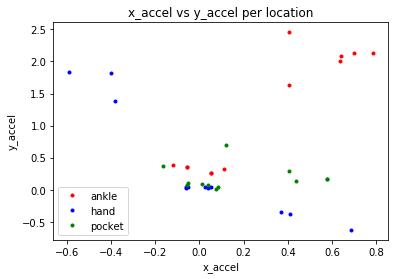

In [22]:
# X and Y values by location
plt.plot(data_ankle['x_accel'], data_ankle['y_accel'], "r.", label='ankle')
plt.plot(data_hand['x_accel'], data_hand['y_accel'], "b.", label='hand')
plt.plot(data_pocket['x_accel'], data_pocket['y_accel'], "g.", label='pocket')
plt.title('x_accel vs y_accel per location')
plt.xlabel('x_accel')
plt.ylabel('y_accel')
plt.legend()
plt.show()

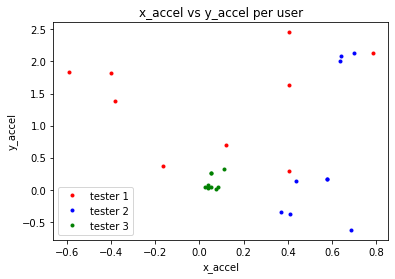

In [23]:
# X and Y values by user
plt.plot(p1_data_mean['x_accel'], p1_data_mean['y_accel'], "r.", label='tester 1')
plt.plot(p2_data_mean['x_accel'], p2_data_mean['y_accel'], "b.", label='tester 2')
plt.plot(p3_data_mean['x_accel'], p3_data_mean['y_accel'], "g.", label='tester 3')
plt.title('x_accel vs y_accel per user')
plt.xlabel('x_accel')
plt.ylabel('y_accel')
plt.legend()
plt.show()

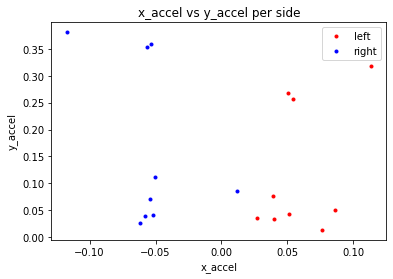

In [31]:
# X and Y values by side
plt.plot(left_data_mean['x_accel'], left_data_mean['y_accel'], "r.", label='left')
plt.plot(right_data_mean['x_accel'], right_data_mean['y_accel'], "b.", label='right')
plt.title('x_accel vs y_accel per side')
plt.xlabel('x_accel')
plt.ylabel('y_accel')
plt.legend()
plt.show()